In [1]:
import sys
import os
import warnings
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import drpy
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import shapely.geometry as sgeom
from matplotlib.gridspec import GridSpec
from datetime import datetime
from re import split
from matplotlib.animation import ArtistAnimation
warnings.filterwarnings('ignore')
from dask_jobqueue import SLURMCluster
from dask.distributed import Client, progress

sys.path.insert(1, f"{os.path.abspath(os.path.join(os.path.abspath(''), '../'))}")
from src.utils import time_3d, get_pars_from_ini
location = split(', |_|-|!', os.popen('hostname').read())[0].replace("\n", "")
path_data = get_pars_from_ini(campaign='loc')[location]['path_data']
path_proj = get_pars_from_ini(campaign='loc')[location]['path_proj']
plt.rcParams['animation.html'] = 'jshtml'
%matplotlib inline

In [2]:
cluster = SLURMCluster(queue="seseml",
                       memory='200GB',
                       cores=40,
                       processes=1,
                       walltime='48:00:00',
                       scheduler_options={'host': '172.22.179.3:7223', 'dashboard_address': ':7999'})

In [3]:
# cluster.scale(2)
cluster.adapt(maximum_jobs=4)
cluster

In [4]:
client = Client(cluster)
client

<Client: 'tcp://172.22.179.3:7223' processes=0 threads=0, memory=0 B>

In [8]:
ds_xr = xr.open_zarr(f'{path_data}/zarr_rckd/KUsKAs_Wn/lores.zarr')

In [10]:
ds_xr.time

<xarray.DataArray 'time' (time: 89835)>
array(['2019-08-24T22:59:26.499800000', '2019-08-24T22:59:28.349800000',
       '2019-08-24T22:59:30.199800000', ..., '2019-10-05T06:53:48.799800000',
       '2019-10-05T06:53:50.649800000', '2019-10-05T06:53:52.499800000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-08-24T22:59:26.499800 ... 2019-10-05T...

In [11]:
ds_xr.time.min()

<xarray.DataArray 'time' ()>
array('2019-08-24T22:59:26.499800000', dtype='datetime64[ns]')

In [12]:
ds_xr.time.max()

<xarray.DataArray 'time' ()>
array('2019-10-05T06:53:52.499800000', dtype='datetime64[ns]')

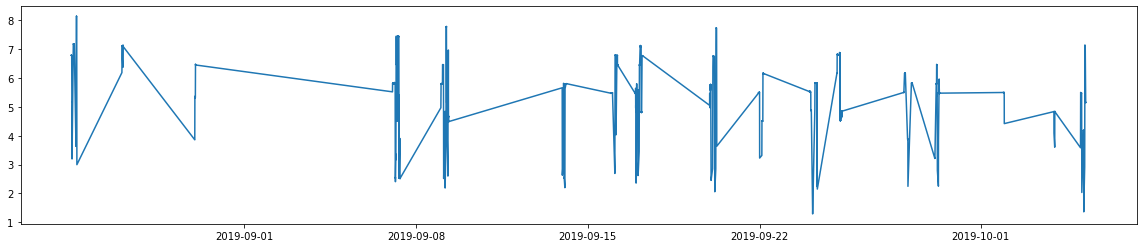

In [13]:
fig, ax = plt.subplots(figsize=(20,4))
plt.plot(ds_xr.time, ds_xr.alt_nav[12, :] / 1000)

In [14]:
ds_aug = ds_xr.sel(time=('2019-09'))

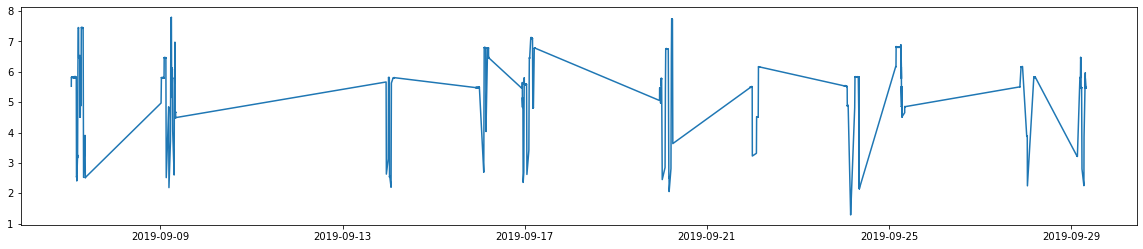

In [15]:
fig, ax = plt.subplots(figsize=(20,4))
plt.plot(ds_aug.time, ds_aug.alt_nav[12, :] / 1000)

In [16]:
 _, index = np.unique(ds_xr['time'], return_index=True)
ds_nw = ds_xr.sel(time=~ds_xr.get_index("time").duplicated())

In [25]:
ds_dates = ds_nw.sel(time=slice('2019-09-16 03:12:00','2019-09-16 03:14:00'))

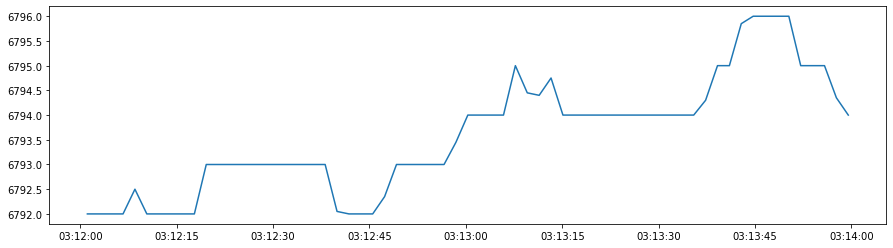

In [26]:
fig, ax = plt.subplots(figsize=(15,4))
plt.plot(ds_dates.time, ds_dates.alt_nav[12, :])

In [27]:
ds_dates.time

<xarray.DataArray 'time' (time: 65)>
array(['2019-09-16T03:12:01.099800000', '2019-09-16T03:12:02.949800000',
       '2019-09-16T03:12:04.799800000', '2019-09-16T03:12:06.649800000',
       '2019-09-16T03:12:08.499800000', '2019-09-16T03:12:10.349800000',
       '2019-09-16T03:12:12.199800000', '2019-09-16T03:12:14.049800000',
       '2019-09-16T03:12:15.899800000', '2019-09-16T03:12:17.749800000',
       '2019-09-16T03:12:19.599800000', '2019-09-16T03:12:21.449800000',
       '2019-09-16T03:12:23.299800000', '2019-09-16T03:12:25.149800000',
       '2019-09-16T03:12:26.999800000', '2019-09-16T03:12:28.849800000',
       '2019-09-16T03:12:30.699800000', '2019-09-16T03:12:32.549800000',
       '2019-09-16T03:12:34.399800000', '2019-09-16T03:12:36.249800000',
       '2019-09-16T03:12:38.099800000', '2019-09-16T03:12:39.949800000',
       '2019-09-16T03:12:41.799800000', '2019-09-16T03:12:43.649800000',
       '2019-09-16T03:12:45.499800000', '2019-09-16T03:12:47.349800000',
       '2019-09-16T03:12:49.199800000', '2019-09-16T03:12:51.049800000',
       '2019-09-16T03:12:52.899800000', '2019-09-16T03:12:54.749800000',
       '2019-09-16T03:12:56.599800000', '2019-09-16T03:12:58.449800000',
       '2019-09-16T03:13:00.299800000', '2019-09-16T03:13:02.149800000',
       '2019-09-16T03:13:03.999800000', '2019-09-16T03:13:05.849800000',
       '2019-09-16T03:13:07.699800000', '2019-09-16T03:13:09.549800000',
       '2019-09-16T03:13:11.399800000', '2019-09-16T03:13:13.249800000',
       '2019-09-16T03:13:15.099800000', '2019-09-16T03:13:16.949800000',
       '2019-09-16T03:13:18.799800000', '2019-09-16T03:13:20.649800000',
       '2019-09-16T03:13:22.499800000', '2019-09-16T03:13:24.349800000',
       '2019-09-16T03:13:26.199800000', '2019-09-16T03:13:28.049800000',
       '2019-09-16T03:13:29.899800000', '2019-09-16T03:13:31.749800000',
       '2019-09-16T03:13:33.599800000', '2019-09-16T03:13:35.449800000',
       '2019-09-16T03:13:37.299800000', '2019-09-16T03:13:39.149800000',
       '2019-09-16T03:13:40.999800000', '2019-09-16T03:13:42.849800000',
       '2019-09-16T03:13:44.699800000', '2019-09-16T03:13:46.549800000',
       '2019-09-16T03:13:48.399800000', '2019-09-16T03:13:50.249800000',
       '2019-09-16T03:13:52.099800000', '2019-09-16T03:13:53.949800000',
       '2019-09-16T03:13:55.799800000', '2019-09-16T03:13:57.649800000',
       '2019-09-16T03:13:59.499800000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-09-16T03:12:01.099800 ... 2019-09-16T...

(0.0, 6000.0)

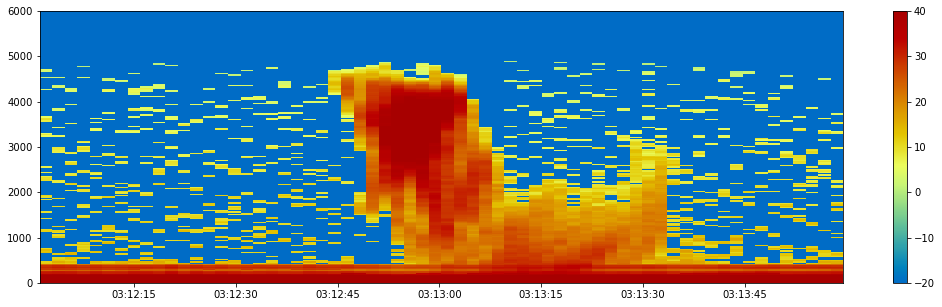

In [29]:
fig = plt.figure(figsize=(18, 5))
ax3 = fig.add_subplot()
time_3D = time_3d(ds_dates.scantime, ds_dates.alt3D.shape[0])
im3 = ax3.pcolormesh(time_3D[:, 12, :],
                       ds_dates.alt3D[:, 12, :],
#                        np.where(ds_dates.z95s[:, 12, :]< 0, np.nan, ds_dates.zhh14[:, 12, :]),
                       ds_dates.zhh14[:, 12, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-20, vmax=40)
plt.colorbar(im3)
ax3.set_ylim(0, 6000)

execution time: 0:07:40.240691


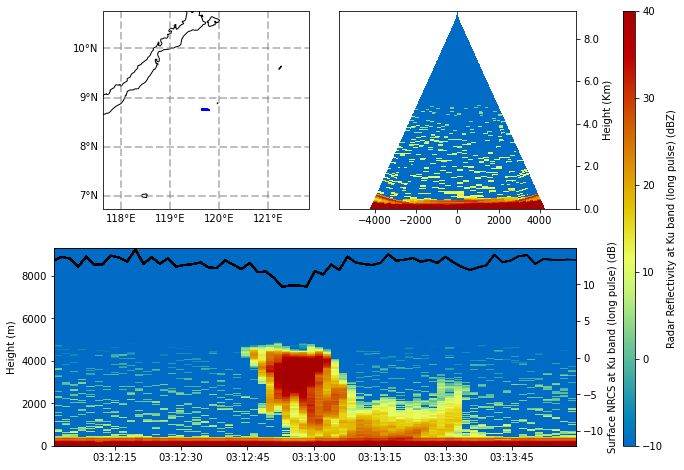

In [30]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[-1, :])
ax4 = ax3.twinx()

artist = []
now = datetime.now()
for _time in ds_dates.time:
    time = _time
    ax1.set_extent([ds_dates.lon.max() + 2, ds_dates.lon.min() - 2, 
                    ds_dates.lat.min() - 2, ds_dates.lat.max() + 2], 
                   crs=ccrs.Geodetic())
    if time == ds_dates.time.min():
        _lon = ds_dates.lon.sel(time=slice(ds_dates.time.min(), time))
        _lat = ds_dates.lat.sel(time=slice(ds_dates.time.min(), time))
    else:
        _lon = ds_dates.lon.sel(time=slice(ds_dates.time.min(), time)).values[12, :]
        _lat = ds_dates.lat.sel(time=slice(ds_dates.time.min(), time)).values[12, :]
        
    track = sgeom.LineString(zip(_lon, _lat))
    im1 = ax1.add_geometries([track], ccrs.PlateCarree(), facecolor='none', edgecolor='blue',
                       linewidth=2)

    x = ds_dates.range * ds_dates.DR.values[0] * np.sin(np.deg2rad(ds_dates.azimuth.sel(time=time)))
    y = ds_dates.alt3D.sel(time=time) 
    im2 = ax2.pcolormesh(x, y, ds_dates.zhh14.sel(time=time), 
                         cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=-10, vmax=40)
    # ax2.invert_yaxis()  # for plane relative coordinates
    ax2.set_ylim(0, y.max())
    times_3d = time_3d(ds_dates.scantime.sel(time=slice(ds_dates.time.min(), time)), 
                       ds_dates.alt3D.shape[0])
    im3 = ax3.pcolormesh(times_3d[:, 12, :],
                       ds_dates.alt3D.sel(time=slice(ds_dates.time.min(), time))[:, 12, :],
                       ds_dates.zhh14.sel(time=slice(ds_dates.time.min(), time))[:, 12, :],
                       cmap=drpy.graph.cmaps.HomeyerRainbow, vmin=0, vmax=40)
    ax3.set_ylim(0, y.max())
    ax3.set_xlim(ds_dates.time.min(), ds_dates.time.max())
    im4, = ax4.plot(times_3d[0, 12, :], ds_dates.s0hh14.sel(time=slice(ds_dates.time.min(), time))[12], 'k')
    ax4.set_ylim(ds_dates.s0hh14.min(), ds_dates.s0hh14.max())
    artist.append([im1, im2, im3, im4])
    
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                   alpha=0.5, linestyle='--')
gl.right_labels = False
gl.top_labels = False
ax1.coastlines()
labels = [i / 1000 for i in ax2.get_yticks()]
ax2.set_yticklabels(labels)
ax2.set_ylabel('Height (Km)')
ax2.yaxis.set_label_position("right")

ax2.yaxis.tick_right()

cbar2 = plt.colorbar(im2, ax=[ax2, ax3], orientation='vertical', aspect=35,  pad=0.07)
cbar2.set_label(f'{ds_dates.zhh14.notes} ({ds_dates.zhh14.units})')
ax3.set_ylabel('Height (m)')
ax4.set_ylabel(f'{ds_dates.s0hh14.notes} ({ds_dates.s0hh14.units})')

end = datetime.now()
print(f'execution time: {(end - now)}')

In [31]:
anim = ArtistAnimation(fig, artist, interval=100, blit=True)
anim

In [32]:
anim.save(f"{path_proj}/results/animation_2.gif", writer='imagemagick', fps=20)